<a href="https://colab.research.google.com/github/ErnandoRizkiD/TugasSLO/blob/main/Ernando_Rizki_D_2101202071_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [72]:
ls

 3scene@                        'TugasSLO_2201202071_Ernando Rizki D.ipynb'
 classify_iris_ANN.ipynb         Untitled0.ipynb
'Salinan dari Untitled1.ipynb'   UTS.ipynb


In [73]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageFilter
from imutils import paths
import numpy as np
import os

In [148]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [149]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((32,32))) / 255.0 #normalisasi
	data.append(image)
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [118]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [150]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [78]:
print (labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [151]:
print(np.array(data).shape)

(948, 32, 32, 3)


In [152]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.18)
print(trainX.shape)
print(testX.shape)

(777, 32, 32, 3)
(171, 32, 32, 3)


In [153]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

model = Sequential(
    [
        Flatten(input_shape=(32*32*3,)),
     Dense(512, activation="relu"),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [154]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_106 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_108 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)              

In [155]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
25/25 [==============================] - 1s 16ms/step - loss: 1.2131 - accuracy: 0.3231 - val_loss: 1.0928 - val_accuracy: 0.3450
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1093 - accuracy: 0.3613 - val_loss: 1.0950 - val_accuracy: 0.3450
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0906 - accuracy: 0.3569 - val_loss: 1.0297 - val_accuracy: 0.3918
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0534 - accuracy: 0.4558 - val_loss: 0.9007 - val_accuracy: 0.6374
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 1.0154 - accuracy: 0.5204 - val_loss: 0.8403 - val_accuracy: 0.6433
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9026 - accuracy: 0.5516 - val_loss: 0.7850 - val_accuracy: 0.6725
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.8839 - accuracy: 0.5600 - val_loss: 0.7363 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


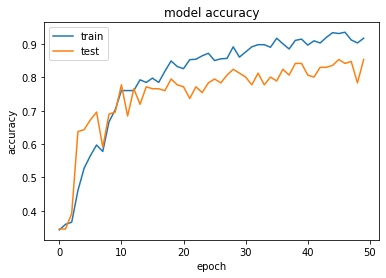

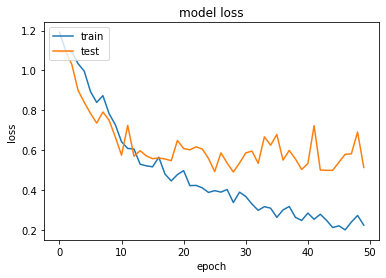

In [156]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [157]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.84      0.86      0.85        59
      forest       0.91      0.88      0.89        66
     highway       0.80      0.80      0.80        46

    accuracy                           0.85       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.85      0.85      0.85       171

